In [ ]:
from tensorflow.python.client import device_lib
print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"
print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13333552 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3534437182968072192
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13417093528863942256
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Q1- A Keras code is provided for running hand written recognition on both GPU and CPU. Run
the code on colab and your own machine and compare the results.**

In [ ]:
import time
start = time.time()
!python3 "./mnist_cnn.py"
end = time.time()
print(end - start)

2021-03-27 04:38:10.181598: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
2021-03-27 04:38:12.216833: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-27 04:38:12.217655: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-27 04:38:12.222820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-27 04:38:12.223369: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-03-27

The time took in my machine is about 2763 seconds. Which is way higher than 43.06 seconds.

**Step2. Implement handwritten recognition in Tensorflow using CNN**

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
if K.image_data_format() == 'channels_first':
 x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
 x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
 input_shape = (1, img_rows, img_cols)
else:
 x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
 x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
 input_shape = (img_rows, img_cols, 1)

In [8]:
from tensorflow import keras
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# Designing the model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',
input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

history = model.fit(x_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_split=0.2)


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
375/375 [==============================] - 33s 7ms/step - loss: 0.5679 - accuracy: 0.8200 - val_loss: 0.0622 - val_accuracy: 0.9824
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.1046 - accuracy: 0.9691 - val_loss: 0.0496 - val_accuracy: 0.9856
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0709 - accuracy: 0.9795 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0545 - accuracy: 0.9826 - val_loss: 0.0396 - val_accuracy: 0.9883
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0354 - val_accuracy: 0.9893
Epoch

**Q2- Explain the way that this model is designed. Talk about all the layers and their functionality.**

The input image is fed into series of CNN layers which includes convolution + relu, pooling , dropout and classification is done using flatten and softmax. 

*Hidden Layers*:

The first two layers are convolutional layers with 32-3x3 , 64-3x3 filters each . First the input image is fed into the 32 filter two dimensional convolutional layer with relu activation . The output from the the 32 filter is sent into  64 filter two dimensional convolutional layer with relu activation. 

The data from the 64 filter convolutional network is fed into a pooling layer which reduces the amount of parameters and computation in the network. 

The dropout has been applied to cut too much association among features by dropping the weights (edges) at a probability.

*Classification*:

The multidimensional output is flattened and passed into dense function and normalized with softmax.  



**Q3- Design the learning curve and talk about what you see.**

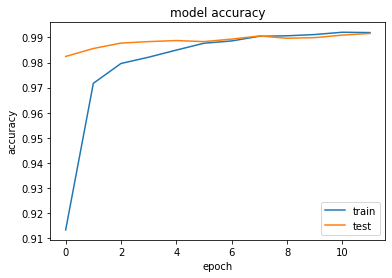

In [13]:
import matplotlib.pyplot as plt

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


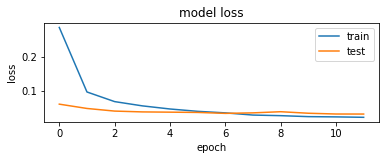

In [14]:

# summarize history for loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The accuracy of the model and the loss remained  consistent with the increase in number of epoch's. The model looks accurate, The model looks like a good fit as the training and validation loss decreases to a point of stability with a minimal gap between the two final loss values.